##Step1:Load The Datasets -Quaterly data

In [4]:
#Statsmodels-hp filter
import pandas as pd
import statsmodels.api as sm
df = sm.datasets.macrodata.load_pandas().data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [10]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

##Step2:Get the DatetimeIndex object for the given years

In [11]:
min(df['year']),max(df['year'])

(1959.0, 2009.0)

In [9]:
df.index=pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))
df.index[:10]

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30'],
              dtype='datetime64[ns]', freq=None)

##Step3:Getting The data plot

In [3]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas.util.testing as tm

In [12]:
df.head(1)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.0,0.0


[Text(0, 0.5, 'Real GDP'), Text(0.5, 0, 'Yr')]

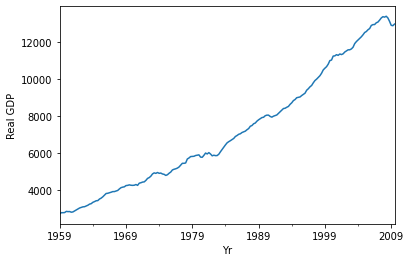

In [18]:
ax=df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='Yr',ylabel='Real GDP')

##Step4:Getting The Trend plot



```
Using Statsmodels to get the trend
Used Function:
statsmodels.tsa.filters.hp_filter.hpfilter(X, lamb=1600)  Hodrick-Prescott filter
The Hodrick-Prescott filter separates a time-series  yt  into a trend component  τt  and a cyclical component  ct 
```
$y_t = \tau_t + c_t$
```
The components are determined by minimizing the following quadratic loss function, where  λ  is a smoothing parameter:

```


$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$
```
The  λ  value above handles variations in the growth rate of the trend component.
When analyzing quarterly data, the default lambda value of 1600 is recommended. 
>>6.25 for annual data. 
>>129,600 for monthly data.
```



In [20]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)
print(type(gdp_trend))
gdp_trend.head(5)

<class 'pandas.core.series.Series'>


1959-03-31    2670.837085
1959-06-30    2698.712468
1959-09-30    2726.612545
1959-12-31    2754.612067
1960-03-31    2782.816333
Name: realgdp, dtype: float64

In [21]:
df['trend']=gdp_trend
df.head(1)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.0,0.0,2670.837085


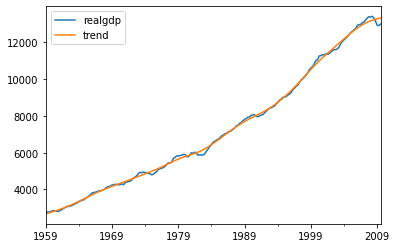

In [28]:
df[['realgdp','trend']].plot().autoscale(axis='x',tight=True)

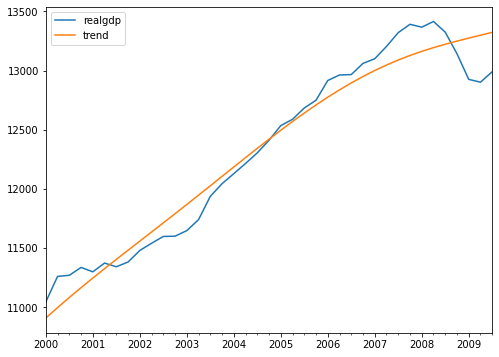

In [29]:
df[['realgdp','trend']]['2000-01-31':].plot(figsize=(8,6)).autoscale(axis='x',tight=True)